# 워드 클라우드 만들기

In [1]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and direc

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 31.3 MB/s eta 0:00:00


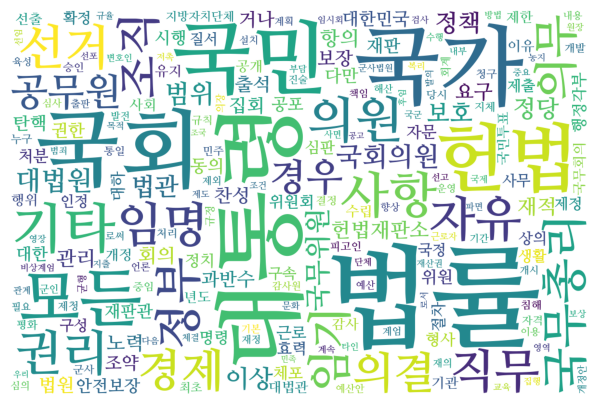

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt

# 대한민국 헌법 텍스트 데이터 불러오기
with open('대한민국 헌법.txt', 'r', encoding='euc-kr') as f:
  text = f.read()

# Konlpy의 Okt 형태소 분석기 사용
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

# 워드 클라우드 생성
wc = WordCloud(font_path='NanumMyeongjoBold.ttf',
               background_color = 'white',
               width = 1200, height = 800)
gen = wc.generate_from_frequencies(c)
# 워드 클라우드 출력
plt.figure(figsize = (12,5))
plt.imshow(gen) # 데이터를 이미지로 출력
plt.axis('off') # 그래프의 모든 축과 이름을 제거
plt.show()


# 마스크를 이용해서 워드클라우드 만들기

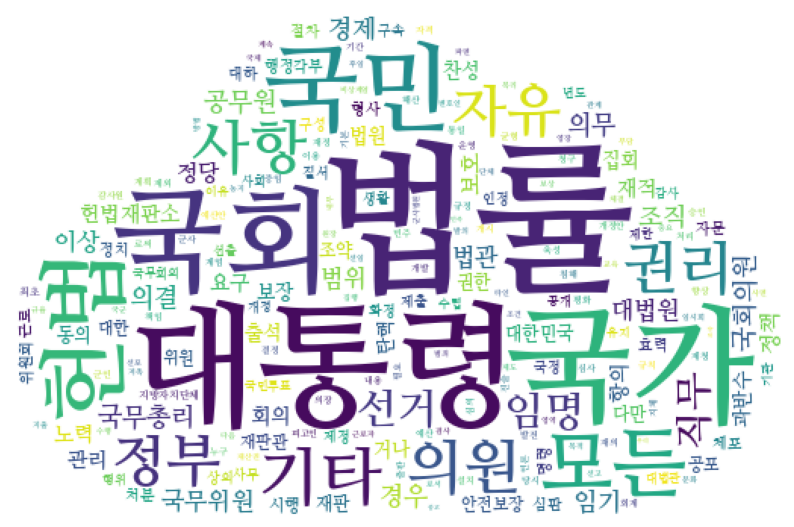

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import PIL # 이미지 처리 라이브러리 (PIllow)

icon = PIL.Image.open('cloud.png')
img = PIL.Image.new('RGB', icon.size, (255,255,255)) # 'cloud.png'이미지와 같은 크기의 새로운 흰색 이미지 생
img.paste(icon, icon) # icon 이미지를 흰색 이미지위에 겹쳐서 붙이기
img_array = np.array(img) # 이미지를 Numpy 배열로 변환


# 대한민국 헌법 텍스트 데이터 불러오기
with open('대한민국 헌법.txt', 'r', encoding='euc-kr') as f:
  text = f.read()
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
wc = WordCloud(random_state = 1234, # 난수 고정
               font_path='NanumMyeongjoBold.ttf',
               background_color = 'white',
               width = 400,
               height = 400,
               mask = img_array) # mask 설정
img_wordcloud = wc.generate_from_frequencies(c)

plt.figure(figsize = (10,10))
plt.imshow(img_wordcloud) # 데이터를 이미지로 출력
plt.axis('off') # 그래프의 모든 축과 이름을 제거
plt.show()